# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))
    df.to_csv('ghcd_daily.csv', index=False, header=False)


    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [2]:
# get dataframe, remove leapyear dates and convert dates to pandas datetime format
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv', na_values=0)
df = df[~df.Date.str.endswith('02-29')]
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort('Date')
df.loc[:,'Data_Value'] *= 0.1

# get only the the 2015 dates
df_2015 = df[df.Date.dt.year == 2015]

# remove the 2015 dates so dataframe only reflects 2005-2014 period
df = df[df.Date.dt.year != 2015]
df.head(10)

,ID,Date,Element,Data_Value
18049,USW00014853,2005-01-01,TMAX,5.6
35479,USC00201502,2005-01-01,TMIN,-3.9
49823,USC00200228,2005-01-01,TMAX,15.0
17153,USC00207320,2005-01-01,TMAX,15.0
49827,USC00200228,2005-01-01,TMIN,-3.9
31718,USC00205451,2005-01-01,TMIN,-4.4
55424,USC00207308,2005-01-01,TMAX,15.0
35771,USC00200230,2005-01-01,TMAX,12.2
35785,USC00200230,2005-01-01,TMIN,-3.9
31715,USC00205451,2005-01-01,TMAX,15.6


In [3]:
# get only the TMAX values and extract the maximum of each day over the 2005-2014 period
tmax = df[df['Element'] == 'TMAX']
tmax['Date'] = tmax['Date'].dt.strftime('%m-%d')
ten_yr_max = tmax.groupby('Date').max()
ten_yr_max.columns = ['ID', 'Element', '2005-14_Max']  # rename the columns for differentiation

# get only the TMIN values and extract the minimum of each day over the 2005-2014 period
tmin = df[df['Element'] == 'TMIN']
tmin['Date'] = tmin['Date'].dt.strftime('%m-%d')
ten_yr_min = tmin.groupby('Date').min()
ten_yr_min.columns = ['ID', 'Element', '2005-14_Min'] # rename the columns for differentiation

# get only the TMAX values and extract the maximum of each day for 2015
tmax_2015 = df_2015[df_2015['Element'] == 'TMAX']
tmax_2015['Date'] = tmax_2015['Date'].dt.strftime('%m-%d')
max_2015 = tmax_2015.groupby('Date').max()
max_2015.columns = ['ID', 'Element', '2015_Max'] # rename the columns for differentiation

# get only the TMIN values and extract the minimum of each day for 2015
tmin_2015 = df_2015[df_2015['Element'] == 'TMIN']
tmin_2015['Date'] = tmin_2015['Date'].dt.strftime('%m-%d')
min_2015 = tmin_2015.groupby('Date').min()
min_2015.columns = ['ID', 'Element', '2015_Min'] # rename the columns for differentiation

ten_yr_max.head()


,ID,Element,2005-14_Max
Date,,,
01-01,USW00094889,TMAX,15.6
01-02,USW00094889,TMAX,13.9
01-03,USW00094889,TMAX,13.3
01-04,USW00094889,TMAX,10.6
01-05,USW00094889,TMAX,12.8


In [4]:
# select only the needed columns and concatonate into a single dataframe for ease
frames = [ten_yr_max['2005-14_Max'], ten_yr_min['2005-14_Min'], max_2015['2015_Max'], min_2015['2015_Min']]
all_max_min = pd.concat(frames, axis=1)
all_max_min = all_max_min.reset_index()
all_max_min.head()

,Date,2005-14_Max,2005-14_Min,2015_Max,2015_Min
0,01-01,15.6,-16.0,1.1,-13.3
1,01-02,13.9,-26.7,3.9,-12.2
2,01-03,13.3,-26.7,3.9,-6.7
3,01-04,10.6,-26.1,4.4,-8.8
4,01-05,12.8,-15.0,2.8,-15.5


In [5]:
# extract the record highs and lows when comparing 2015 tp the previous 10 years of data
record_highs = all_max_min['2015_Max'][all_max_min['2015_Max'] > all_max_min['2005-14_Max']]
record_lows = all_max_min['2015_Min'][all_max_min['2015_Min'] < all_max_min['2005-14_Min']]
record_lows

4     -15.5
10    -20.0
33    -23.8
44    -23.9
45    -26.0
46    -29.4
47    -27.2
49    -26.0
50    -34.3
51    -32.2
53    -26.7
54    -27.2
55    -21.7
56    -21.6
57    -28.8
58    -27.2
63    -22.1
64    -25.5
65    -22.2
86    -12.2
87    -11.1
88    -12.2
113    -7.1
114    -5.0
139     1.1
183     7.2
239     5.6
289    -5.5
290    -5.5
291    -6.1
292    -3.9
313    -4.4
Name: 2015_Min, dtype: float64

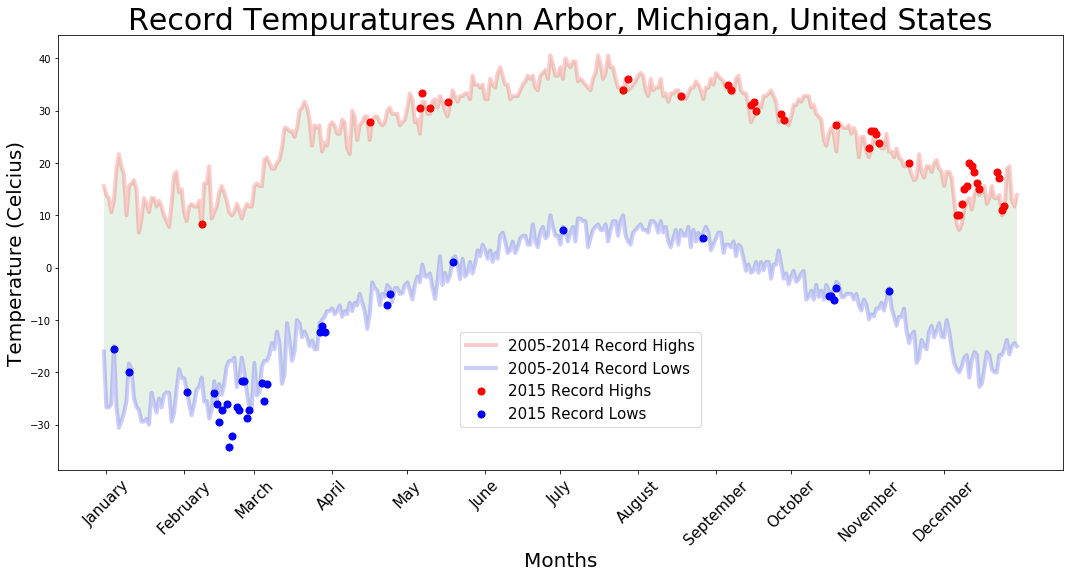

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt

plt.rcParams['figure.figsize'] = [18, 8]
plt.plot(range(len(all_max_min)), all_max_min['2005-14_Max'], color='r', alpha=0.2, linewidth=4)
plt.plot(range(len(all_max_min)), all_max_min['2005-14_Min'], color='b', alpha=0.2, linewidth=4)
plt.scatter(record_highs.index, record_highs, marker='o', color='r', s=50)
plt.scatter(record_lows.index, record_lows, marker='o', color='b', s=50)
plt.gca().fill_between(range(len(all_max_min)), all_max_min['2005-14_Min'], 
                        all_max_min['2005-14_Max'], facecolor='green', alpha=0.1)

plt.xlabel('Months', fontsize=20)
plt.ylabel('Temperature (Celcius)', fontsize=20)
plt.title('Record Tempuratures Ann Arbor, Michigan, United States', fontsize=30)
plt.legend(['2005-2014 Record Highs', '2005-2014 Record Lows', '2015 Record Highs', 
            '2015 Record Lows'], fontsize=15, loc=(0.4,0.1))

plt.xticks([1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335], 
           ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
            'August', 'September', 'October', 'November', 'December'], rotation=45, fontsize=15)

plt.show()
